<a href="https://colab.research.google.com/github/PhamBaVuong/DataAnalysisDeepLearning/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Example**

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving countriessample.csv to countriessample.csv


In [135]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def load_data(filename):
  return pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/covid19/' + filename)
dfcovid19 = load_data('countriessample.csv')
dfcovid19.head()

,Date,CountryRegion,Confirmed,Recovered,Deaths
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0
1,1/22/2020,Greece;Europe,NaN,NaN,0.0
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0
3,1/22/2020,India;Asia,0.0,NaN,0.0
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0


**Example 1:**

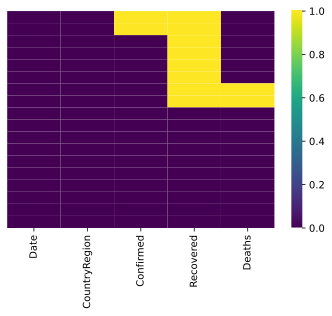

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(dfcovid19.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

**Example 2:**

In [ ]:
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
})

print("The original dataframe:\n")
print(df)

def get_mean(scores):
    return sum(scores)/len(scores)

result = df.apply(get_mean)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

   History  Math  English
0       76    81       72
1       84    67       93
2       68    91       84
3       94    86       76

The result of applying the function on the dataframe:

History    80.50
Math       81.25
English    81.25
dtype: float64


**Example 3:**

In [ ]:
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
}, index=['Sam', 'Greta', 'Mike', 'Emma'])

print("The original dataframe:\n")
print(df)

def get_mean(scores):
    return sum(scores)/len(scores)

result = df.apply(get_mean, axis=1)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

       History  Math  English
Sam         76    81       72
Greta       84    67       93
Mike        68    91       84
Emma        94    86       76

The result of applying the function on the dataframe:

Sam      76.333333
Greta    81.333333
Mike     81.000000
Emma     85.333333
dtype: float64


**Example 4:**

In [ ]:
def split_name_series(string):
  country, region=string.split(';')
  return pd.Series(
      (country, region),
      index='country, region'.split()
  )

def split_name(x_df):
    res=x_df['CountryRegion'].apply(split_name_series)
    x_df[res.columns]=res
    return x_df

**Example 5:**

In [ ]:
res = load_data('countriessample.csv').pipe(split_name)
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,Africa
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,Europe
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,Europe
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,Asia
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,Asia
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,Asia
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,Asia
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,Europe
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,Africa
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,South America


**Example 6:**

In [ ]:
def substitute_region(x_df):
    mapping={'Africa':'AF', 'Asia':'AS','Europe':'EU','South America':'SA','North America':'NA'}
    x_df['region']=x_df['region'].map(mapping)
    return x_df

res=(res.pipe(substitute_region))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA


**Example 7:**

In [ ]:
import numpy as np
a = pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)
a

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

**Example 8:**

In [ ]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]),bins = 3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

**Example 9:**

In [ ]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,labels=["B", "A", "B"], ordered=False)

['B', 'B', 'A', 'A', 'B', 'B']
Categories (2, object): ['A', 'B']

**Example 10:**

In [ ]:
def create_evaluation_group(x_df):
    bins=[0.0, 3000, 5000, sys.maxsize]
    labels=['normal', 'medium', 'worst']
    evaluationGroup=pd.cut(x_df['Confirmed'], bins=bins, labels=labels,include_lowest=True)
    x_df['Evaluation']=evaluationGroup
    return x_df

res=(res.pipe(create_evaluation_group))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region,Evaluation
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF,NaN
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU,NaN
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU,normal
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS,normal
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS,normal
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS,normal
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS,normal
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU,normal
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF,medium
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA,normal


In [2]:
from google.colab import files
uploaded = files.upload()

Saving processed_dulieuxettuyendaihoc.csv to processed_dulieuxettuyendaihoc.csv


In [3]:
import pandas as pd
import io

In [4]:
dlxtdh = pd.read_csv(io.StringIO(uploaded['processed_dulieuxettuyendaihoc.csv'].decode('utf-8')))

Phần 1: Thống kê dữ liệu

1. Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần

In [5]:
dlxtdh.sort_values(by = 'DH1')

,Unnamed: 0,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT
53,53,54,4.9,5.9,6.2,5.6,5.9,5.0,7.0,5.6,6.1,7.1,6.4,6.0,6.3,5.5,6.2,6.6,2.5,4.8,5.0,5.0,4.5,2.4,5.8,3.7,6.2,4.1,4.4,5.2,4.1,6.3,4.9,4.6,4.9,5.2,4.9,5.5,5.5,4.6,5.5,5.4,6.5,7.5,6.1,5.6,5.2,5.7,5.6,6.3,M,0.0,1,1.00,5.50,4.25,A,5.69,6.26,6.02,TB,TB,TB,2.276,2.504,2.408,0.0
43,43,44,6.6,7.2,5.9,6.9,7.6,8.1,7.3,6.7,6.3,6.9,6.0,6.4,7.0,7.1,6.9,6.2,6.7,7.1,5.4,6.8,6.8,5.9,6.6,6.8,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,5.8,5.9,5.8,4.6,6.6,4.0,6.0,6.2,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,F,1.0,2,1.25,3.50,5.00,D1,7.05,6.61,6.77,K,K,K,2.820,2.644,2.708,0.0
72,72,73,5.5,6.6,7.2,7.6,5.5,6.7,6.7,5.2,6.0,6.8,6.3,7.2,4.9,4.8,6.6,5.3,4.6,5.5,5.5,7.1,5.2,6.1,7.1,5.4,5.2,4.7,5.8,6.3,5.7,5.6,5.2,5.3,5.2,5.5,6.3,6.6,6.1,6.5,5.3,5.2,6.1,6.2,7.3,7.8,5.5,5.9,6.3,5.5,M,0.0,1,1.50,4.50,5.50,A,6.20,5.88,6.22,TB,TB,TB,2.480,2.352,2.488,0.0
5,5,6,9.3,7.6,7.9,8.6,7.0,7.3,7.7,7.9,9.6,7.8,8.0,8.7,7.7,8.0,9.2,9.1,7.1,8.5,8.1,8.7,7.2,8.4,7.7,8.2,8.5,8.5,7.7,9.2,8.0,6.6,7.3,8.8,8.5,7.6,8.1,9.0,8.4,6.6,6.6,8.2,7.8,6.4,7.2,7.7,7.7,5.7,8.0,7.8,M,0.0,1,1.50,4.00,6.00,D1,7.96,8.54,7.38,K,G,K,3.184,3.416,2.952,0.0
87,87,88,7.3,4.3,5.3,5.8,4.9,3.7,5.6,5.3,5.9,6.0,6.3,5.9,5.0,6.6,6.6,4.6,7.1,6.3,7.3,6.7,6.5,5.4,6.7,5.5,7.7,5.4,7.5,7.1,6.8,5.8,6.8,6.5,7.9,5.9,5.9,5.9,5.7,6.1,6.8,6.7,6.6,6.4,6.9,5.7,6.4,6.4,7.2,6.2,M,0.0,1,1.75,4.00,4.50,A,5.44,5.78,6.48,TB,TB,TB,2.176,2.312,2.592,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,85,8.4,7.4,6.0,7.8,6.3,7.2,8.5,6.0,9.3,7.0,8.5,8.8,6.9,6.9,7.3,6.8,7.4,7.0,8.0,7.5,7.1,6.7,8.4,5.8,7.7,6.7,8.2,7.5,7.5,6.1,8.1,6.5,8.2,5.9,7.9,8.6,6.1,5.1,7.2,6.1,8.6,7.8,8.9,8.5,6.7,5.5,7.9,6.6,M,0.0,1,6.50,4.50,8.00,A,7.23,7.77,7.58,K,K,K,2.892,3.108,3.032,1.0
11,11,12,7.9,7.0,9.1,8.6,6.1,7.0,5.6,9.0,8.2,7.1,8.8,7.6,6.9,7.3,7.2,9.0,8.1,8.4,8.5,7.6,5.5,8.0,6.6,8.6,6.9,7.0,8.9,8.6,5.6,5.3,7.1,8.3,8.0,7.8,8.6,7.3,6.2,3.9,5.7,8.6,8.1,7.9,8.3,7.9,6.4,6.4,6.7,8.7,M,0.0,2,6.75,6.50,4.25,D1,7.43,7.72,7.49,K,K,K,2.972,3.088,2.996,1.0
23,23,24,5.3,6.3,5.7,6.9,5.9,7.5,6.6,5.1,6.4,6.9,4.7,7.4,6.1,8.4,6.4,4.4,6.1,5.8,5.1,7.4,6.7,7.1,6.7,4.3,5.0,3.5,4.5,7.3,6.1,8.8,7.9,3.9,5.3,5.5,6.3,6.7,6.7,7.5,6.7,4.5,6.1,6.8,6.4,6.4,7.6,8.8,6.1,5.2,M,0.0,2NT,6.75,5.25,5.00,C,6.05,6.32,6.71,TB,TB,K,2.420,2.528,2.684,1.0
24,24,25,2.4,4.1,3.6,5.5,5.9,5.6,4.9,4.2,3.3,5.7,4.9,5.3,5.7,4.5,5.6,4.8,3.9,4.6,4.6,6.9,5.7,8.0,5.1,4.7,3.3,5.3,5.6,6.9,7.2,7.3,6.1,3.6,4.4,5.0,4.4,5.6,6.8,4.0,5.0,5.2,3.8,6.3,4.5,6.6,7.1,4.1,5.7,5.1,F,0.0,1,7.00,2.25,5.25,C,4.45,4.88,5.41,Y,Y,TB,1.780,1.952,2.164,0.0


2. Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính

In [7]:
dlxtdh.sort_values(by = ['GT', 'DT'])

,Unnamed: 0,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT
0,0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,5.8,9.0,6.6,8.7,7.2,5.8,7.4,7.4,5.2,6.6,6.9,8.9,8.1,5.8,7.2,7.1,5.9,7.2,6.6,5.8,8.1,5.9,7.4,5.6,6.1,5.7,7.9,5.0,7.4,5.0,6.9,5.7,6.5,7.2,8.4,6.6,7.6,5.9,F,0.0,2NT,3.25,3.25,4.50,A1,7.00,7.54,7.01,K,K,K,2.800,3.016,2.804,0.0
6,6,7,2.8,3.9,5.5,6.9,5.0,7.3,4.6,5.2,4.4,6.7,5.5,7.7,5.0,6.6,6.1,4.6,4.6,4.8,4.4,8.1,5.6,6.0,4.8,3.9,4.7,6.3,4.8,7.1,6.8,7.7,6.6,5.6,5.4,4.5,5.0,5.0,5.9,6.1,6.1,4.8,5.3,7.0,6.0,5.7,6.1,6.6,6.0,6.0,F,0.0,2,6.50,6.75,5.25,C,4.90,5.60,6.01,Y,TB,TB,1.960,2.240,2.404,1.0
7,7,8,8.3,6.0,7.6,5.1,7.5,4.7,5.8,7.2,6.7,6.3,6.4,7.1,7.3,6.9,6.1,7.9,8.6,5.7,6.9,6.6,7.4,6.0,5.8,6.5,8.3,5.3,6.2,6.4,7.6,5.4,6.7,6.3,8.5,7.0,6.1,6.4,6.6,4.8,7.4,6.9,8.3,6.7,5.6,5.9,7.3,7.1,6.8,7.0,F,0.0,2,3.75,4.50,4.25,D1,6.80,6.87,7.03,K,K,K,2.720,2.748,2.812,0.0
8,8,9,6.5,6.3,7.6,6.0,5.5,7.1,6.3,5.0,7.3,6.8,7.3,6.5,6.4,7.9,7.6,3.7,6.4,6.7,6.7,7.3,6.2,6.1,8.2,5.7,8.1,6.0,6.3,7.8,7.2,7.6,8.5,5.7,7.7,7.5,8.8,6.5,5.6,5.6,7.1,6.7,7.7,8.7,8.9,7.5,6.0,9.1,7.9,6.1,F,0.0,1,3.50,3.50,6.75,D1,6.23,6.72,7.56,TB,K,K,2.492,2.688,3.024,0.0
9,9,10,7.3,5.9,4.7,7.1,6.7,7.9,6.7,7.7,8.0,6.8,7.6,6.9,6.8,7.8,6.4,7.4,6.5,7.3,6.0,7.8,7.2,7.9,7.1,7.7,5.5,7.0,6.0,6.7,8.0,7.2,6.3,7.2,7.5,7.0,8.0,5.9,7.1,6.3,5.1,7.1,6.9,7.0,6.7,7.1,7.7,6.4,6.1,7.8,F,0.0,1,4.00,4.75,5.50,D1,6.80,7.25,7.03,K,K,K,2.720,2.900,2.812,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,98,8.8,5.5,7.4,7.7,6.2,7.3,8.1,4.5,9.5,7.3,6.0,8.4,7.0,8.4,8.8,6.5,9.5,6.6,6.4,7.6,7.0,9.6,9.3,6.7,8.5,6.9,5.8,8.4,8.0,8.9,9.6,7.1,9.0,7.1,6.7,5.7,6.9,8.6,8.6,5.9,8.5,7.1,6.2,8.6,7.0,9.6,8.4,5.8,M,0.0,2NT,7.00,8.00,4.00,C,7.05,7.84,7.67,K,K,K,2.820,3.136,3.068,1.0
98,98,99,2.7,1.8,3.4,5.3,4.5,7.9,4.9,3.8,2.8,5.7,5.1,5.0,5.5,6.6,3.9,4.3,6.2,6.9,7.6,6.3,4.7,7.4,5.9,5.7,5.2,5.1,6.8,5.6,3.8,5.9,6.7,4.4,4.1,5.3,5.7,4.6,5.0,5.9,5.3,4.5,4.3,5.6,6.3,4.7,5.0,6.6,5.2,5.9,M,0.0,1,5.00,3.50,5.50,C,4.15,4.72,5.29,Y,Y,TB,1.660,1.888,2.116,0.0
99,99,100,4.1,5.2,4.9,5.3,5.5,5.4,7.2,5.4,4.4,6.4,4.8,7.2,6.0,6.3,6.8,4.9,6.0,4.9,4.2,6.4,5.7,6.8,7.1,6.2,4.3,4.9,5.3,6.5,5.7,6.8,7.4,5.8,5.6,6.2,6.0,4.7,5.7,7.9,6.9,4.7,5.1,6.4,5.9,5.4,6.3,5.6,6.6,5.8,M,0.0,2NT,5.25,2.50,4.25,C,5.26,5.72,5.85,TB,TB,TB,2.104,2.288,2.340,0.0
59,59,60,3.6,4.6,5.0,6.9,5.2,4.5,5.8,7.3,3.5,4.1,3.4,7.3,5.5,6.0,5.6,7.5,4.2,3.4,3.4,6.6,4.7,6.3,4.8,7.5,3.2,5.9,3.6,8.2,5.9,6.8,6.3,7.7,4.4,2.6,4.9,5.7,5.6,6.1,4.8,7.4,4.9,6.1,4.3,7.0,5.1,5.8,6.1,8.4,M,1.0,1,3.00,4.00,4.00,D1,5.17,5.19,5.77,TB,TB,TB,2.068,2.076,2.308,0.0


3. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT

In [10]:
import numpy as np

In [18]:
def Q1(n):
  return np.percentile(n, 25)

def Q2(n):
  return np.percentile(n, 50)

def Q3(n):
  return np.percentile(n, 75)

def std(n):
  return np.std(n)

pt1 = dlxtdh.pivot_table(index = ['KT'], values = 'DH1', aggfunc = ['count', 'sum', 'mean', 'median', 'min', 'max', std, Q1, Q2, Q3])
pt1

,count,sum,mean,median,min,max,std,Q1,Q2,Q3
,DH1,DH1,DH1,DH1,DH1,DH1,DH1,DH1,DH1,DH1
KT,,,,,,,,,,
A,49,163.50,3.336735,3.25,1.00,6.50,1.261226,2.2500,3.25,4.250
A1,6,17.50,2.916667,3.00,2.00,4.25,0.786165,2.1875,3.00,3.250
B,9,29.50,3.277778,3.50,1.75,4.50,0.776785,3.2500,3.50,3.750
C,14,79.25,5.660714,5.25,4.75,7.00,0.782665,5.0625,5.25,6.375
D1,22,84.25,3.829545,3.75,1.25,6.75,1.338644,3.0000,3.75,4.875


4. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT và KV

In [20]:
pt2 = dlxtdh.pivot_table(index = ['KT', 'KV'], values = 'DH1', aggfunc = ['count', 'sum', 'mean', 'median', 'min', 'max', std, Q1, Q2, Q3])
pt2

count    sum      mean median  ...       std      Q1     Q2      Q3
         DH1    DH1       DH1    DH1  ...       DH1     DH1    DH1     DH1
KT KV                                 ...                                 
A  1      29  93.75  3.232759  3.250  ...  1.345380  2.0000  3.250  4.2500
   2       9  31.75  3.527778  3.500  ...  1.346005  2.2500  3.500  4.2500
   2NT    11  38.00  3.454545  3.500  ...  0.871377  2.8750  3.500  4.1250
A1 1       2   4.75  2.375000  2.375  ...  0.375000  2.1875  2.375  2.5625
   2NT     4  12.75  3.187500  3.250  ...  0.797947  2.9375  3.250  3.5000
B  1       8  25.75  3.218750  3.375  ...  0.804650  3.0000  3.375  3.5625
   2NT     1   3.75  3.750000  3.750  ...  0.000000  3.7500  3.750  3.7500
C  1       8  43.50  5.437500  5.250  ...  0.681795  5.0000  5.250  5.4375
   2       2  11.50  5.750000  5.750  ...  0.750000  5.3750  5.750  6.1250
   2NT     4  24.25  6.062500  6.000  ...  0.817294  5.2500  6.000  6.8125
D1 1      13  46.75  3.596154  3.500  ...  1.215044  2.7500  3.500  4.2500
   2       8  33.75  4.218750  4.500  ...  1.512642  3.5625  4.500  5.0000
   2NT     1   3.75  3.750000  3.750  ...  0.000000  3.7500  3.750  3.7500

[13 rows x 10 columns]

5. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT, KV và DT

In [172]:
pt3 = dlxtdh.pivot_table(index = ['KT', 'KV', 'DT'], values = 'DH1', aggfunc = ['count', 'sum', 'mean', 'median', 'min', 'max', std, Q1, Q2, Q3])
pt3

count    sum      mean median  ...       std      Q1     Q2      Q3
             DH1    DH1       DH1    DH1  ...       DH1     DH1    DH1     DH1
KT KV  DT                                 ...                                 
A  1   0.0    29  93.75  3.232759  3.250  ...  1.345380  2.0000  3.250  4.2500
   2   0.0     8  27.50  3.437500  3.000  ...  1.401729  2.2500  3.000  4.1875
       6.0     1   4.25  4.250000  4.250  ...  0.000000  4.2500  4.250  4.2500
   2NT 0.0    11  38.00  3.454545  3.500  ...  0.871377  2.8750  3.500  4.1250
A1 1   0.0     2   4.75  2.375000  2.375  ...  0.375000  2.1875  2.375  2.5625
   2NT 0.0     4  12.75  3.187500  3.250  ...  0.797947  2.9375  3.250  3.5000
B  1   0.0     8  25.75  3.218750  3.375  ...  0.804650  3.0000  3.375  3.5625
   2NT 0.0     1   3.75  3.750000  3.750  ...  0.000000  3.7500  3.750  3.7500
C  1   0.0     8  43.50  5.437500  5.250  ...  0.681795  5.0000  5.250  5.4375
   2   0.0     2  11.50  5.750000  5.750  ...  0.750000  5.3750  5.750  6.1250
   2NT 0.0     4  24.25  6.062500  6.000  ...  0.817294  5.2500  6.000  6.8125
D1 1   0.0    12  43.75  3.645833  3.625  ...  1.251908  2.6875  3.625  4.4375
       1.0     1   3.00  3.000000  3.000  ...  0.000000  3.0000  3.000  3.0000
   2   0.0     7  32.50  4.642857  4.500  ...  1.084445  4.1250  4.500  5.0000
       1.0     1   1.25  1.250000  1.250  ...  0.000000  1.2500  1.250  1.2500
   2NT 0.0     1   3.75  3.750000  3.750  ...  0.000000  3.7500  3.750  3.7500

[16 rows x 10 columns]

Phần 2: Trình bày dữ liệu

1. Hãy trình bày dữ liệu biến GT:
Gợi ý - Lập bảng tần số và tần suất - Vẽ biểu đồ tần số (cột), biểu đồ tần suất (tròn) và biểu đồ tích lũy tần suất (đa giác tích lũy)

In [51]:
gt = dlxtdh.groupby('GT')['GT'].agg(['count'])
#gt = pd.pivot_table(dlxtdh.groupby('GT')['GT'].agg(['count']), colums = 'GT')

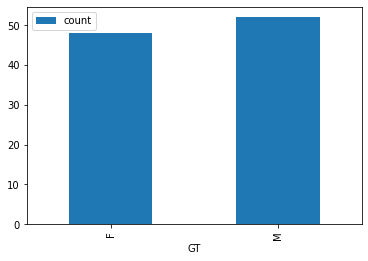

In [53]:
gt.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f02adf150>],
      dtype=object)

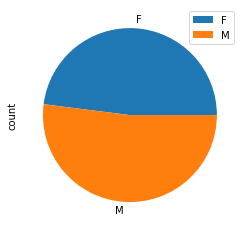

In [48]:
gt.plot.pie(subplots = True)

1. Hãy trình bày dữ liệu lần lượt các biến: US_TBM1, US_TBM2 và US_TBM3

In [ ]:
us1 = dlxtdh['US_TBM1'].value_counts()
us1

2.048    3
2.972    2
2.276    2
2.720    2
2.724    2
        ..
2.176    1
2.480    1
2.108    1
1.984    1
1.616    1
Name: US_TBM1, Length: 90, dtype: int64

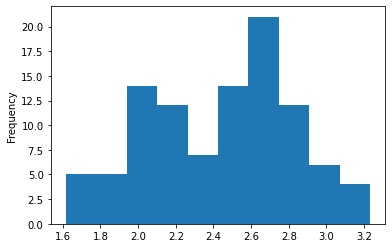

In [134]:
dlxtdh['US_TBM1'].plot.hist('''bins = 20''')
#plt.xlabel('aaa')

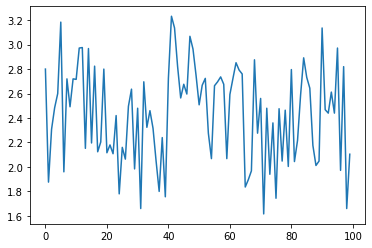

In [64]:
dlxtdh['US_TBM1'].plot.line()

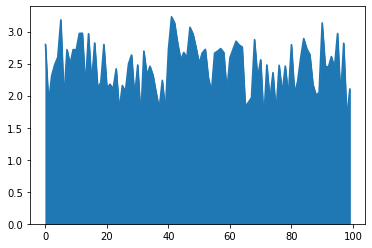

In [66]:
dlxtdh['US_TBM1'].plot.area()

In [68]:
us2 = dlxtdh['US_TBM2'].value_counts()
us2

3.028    2
2.900    2
2.652    2
2.208    2
2.188    2
        ..
2.528    1
2.128    1
2.548    1
2.968    1
2.228    1
Name: US_TBM2, Length: 91, dtype: int64

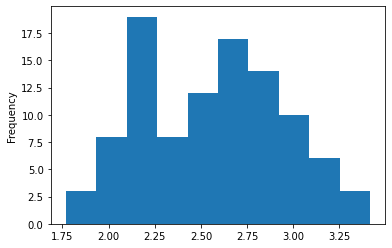

In [70]:
dlxtdh['US_TBM2'].plot.hist()

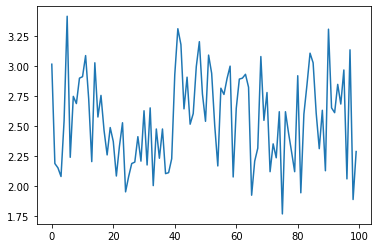

In [72]:
dlxtdh['US_TBM2'].plot.line()

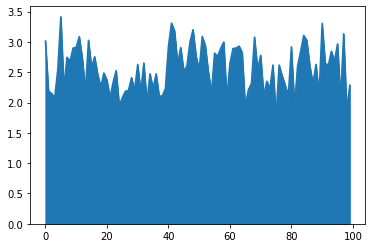

In [ ]:
dlxtdh['US_TBM2'].plot.area()

In [ ]:
us3 = dlxtdh['US_TBM3'].value_counts()
us3

2.688    2
2.636    2
2.812    2
2.752    2
2.504    2
        ..
2.632    1
2.096    1
2.432    1
3.200    1
3.000    1
Name: US_TBM3, Length: 91, dtype: int64

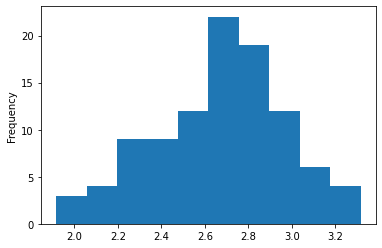

In [ ]:
dlxtdh['US_TBM3'].plot.hist()

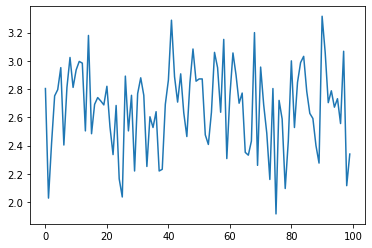

In [73]:
dlxtdh['US_TBM3'].plot.line()

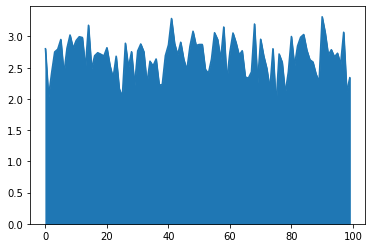

In [ ]:
dlxtdh['US_TBM3'].plot.area()

2. Hãy trình bày dữ liệu biến DT với các học sinh là nam

In [88]:
nam1 = dlxtdh[dlxtdh.GT=='M'].groupby(['DT','GT']).agg({'GT':'count'})
nam1

,,GT
DT,GT,
0.0,M,50
1.0,M,1
6.0,M,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ef1434590>],
      dtype=object)

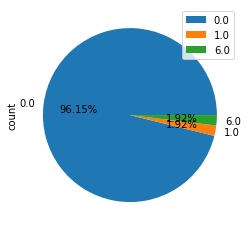

In [97]:
nam = dlxtdh.loc[dlxtdh['GT'] == 'M'].groupby('DT')['DT'].agg(['count'])
nam.plot.pie(subplots = True, autopct = '%.2f%%')
#dlxtdh.loc[(dlxtdh.GT =='M'),'DT'].hist()

3. Hãy trình bày dữ liệu biến KV với các học sinh là nam thuộc dân tộc Kinh, có điểm thõa mãn điều kiện (DH1 >= 5.0 và DH2 >= 4.0 và DH3 >= 4.0)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ef116fa50>],
      dtype=object)

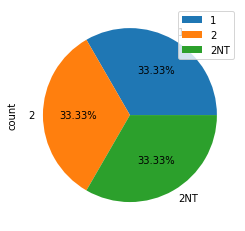

In [104]:
#dlxtdh[dlxtdh.KV.isin(['1','2','2NT']) & dlxtdh.DT.isin(['0.0']) & (dlxtdh.GT=='M') & (dlxtdh.DH1>=5.0) & (dlxtdh.DH2 >=4.0) & (dlxtdh.DH3>=4.0)].groupby(['DT','GT','KV']).agg({'GT':'count'}).plot.pie(subplots = True)
dlxtdh.loc[(dlxtdh['GT'] == 'M') & (dlxtdh['DT'] == 0) & (dlxtdh['DH1'] >= 5) & (dlxtdh['DH2'] >= 4) & (dlxtdh['DH3'] >= 4)].groupby('KV')['KV'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

4. Hãy trình bày dữ liệu lần lượt các biến DH1, DH2, DH3 lớn hơn bằng 5.0 và thuộc khu vực 2NT

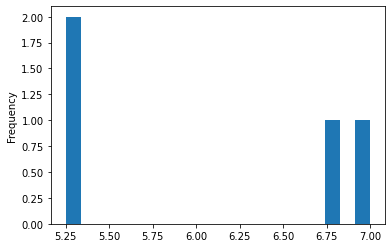

In [131]:
dlxtdh['DH1'].loc[(dlxtdh['DH1'] >= 5) & (dlxtdh['KV'] == '2NT')].plot.hist(bins = 20)
#plt.xlabel()
#plt.ylabel()

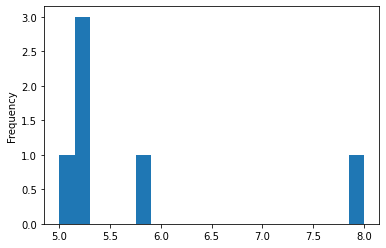

In [120]:
dlxtdh['DH2'].loc[(dlxtdh['DH2'] >= 5) & (dlxtdh['KV'] == '2NT')].plot.hist(bins = 20)

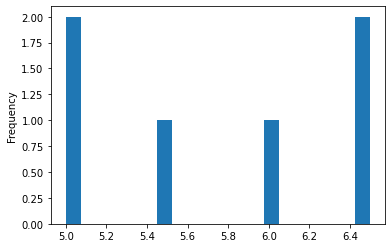

In [121]:
dlxtdh['DH3'].loc[(dlxtdh['DH3'] >= 5) & (dlxtdh['KV'] == '2NT')].plot.hist(bins = 20)

Phần 3: Trực quan hóa dữ liệu theo nhóm phân loại

1. Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked Gợi ý - Lọc dữ liệu giới tính là nữ - Oy: Chiều cao biểu đồ cột thể hiển số lượng học sinh theo xếp loại - Màu sắc thể hiện giá trị xếp loại: [Y, TB, K, G, XS] - Ox: thể hiện nhóm XL1, XL2 và XL3

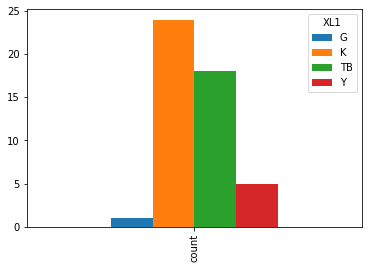

In [276]:
pd.pivot_table(dlxtdh.loc[dlxtdh['GT'] == 'F'].groupby(['XL1'])['GT'].agg(['count']), columns = 'XL1').plot.bar(stacked = False)
#plt.xlabel('XL1')

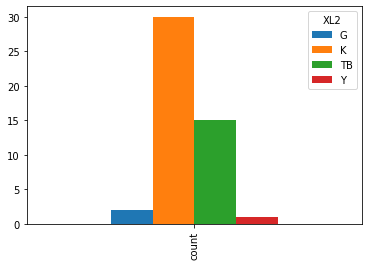

In [273]:
pd.pivot_table(dlxtdh.loc[dlxtdh['GT'] == 'F'].groupby(['XL2'])['GT'].agg(['count']), columns = 'XL2').plot.bar(stacked = False)

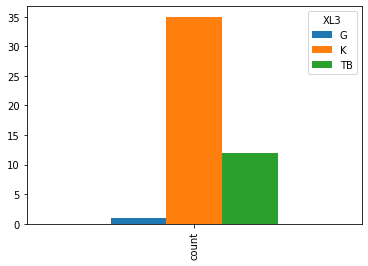

In [168]:
pd.pivot_table(dlxtdh.loc[dlxtdh['GT'] == 'F'].groupby(['XL3'])['GT'].agg(['count']), columns = 'XL3').plot.bar(stacked = False)

2. Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec7c6410>],
      dtype=object)

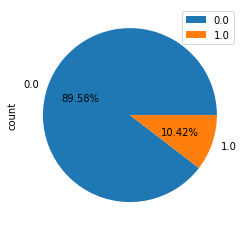

In [183]:
kv = dlxtdh.loc[(dlxtdh['KV'] == '1')].append(dlxtdh.loc[(dlxtdh['KV'] == '2')])
kt = kv.loc[(kv['KT'] == 'A') | (kv['KT'] == 'A1') | (kv['KT'] == 'B')]
kt.groupby('KQXT')['KT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

3. Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eeaf57090>],
      dtype=object)

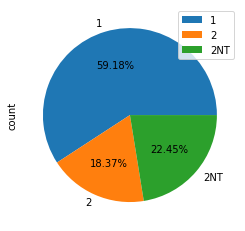

In [278]:
dlxtdh.loc[dlxtdh['KT'] == 'A'].groupby('KV')['KT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eecff2c50>],
      dtype=object)

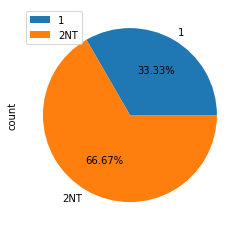

In [159]:
dlxtdh.loc[dlxtdh['KT'] == 'A1'].groupby('KV')['KT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eecfc2e50>],
      dtype=object)

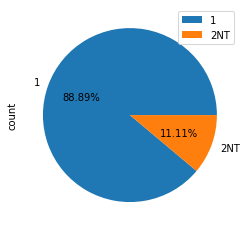

In [160]:
dlxtdh.loc[dlxtdh['KT'] == 'B'].groupby('KV')['KT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec7de150>],
      dtype=object)

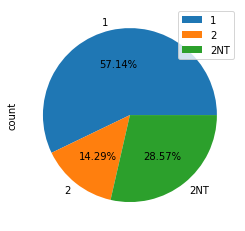

In [184]:
dlxtdh.loc[dlxtdh['KT'] == 'C'].groupby('KV')['KT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec6d7690>],
      dtype=object)

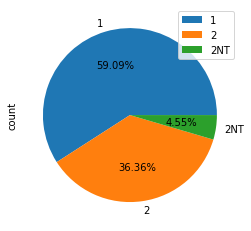

In [186]:
dlxtdh.loc[dlxtdh['KT'] == 'D1'].groupby('KV')['KT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

4. Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec5c9d10>],
      dtype=object)

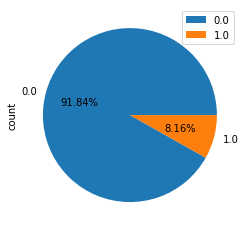

In [191]:
dlxtdh.loc[dlxtdh['KT'] == 'A'].groupby('KQXT')['KT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec529ed0>],
      dtype=object)

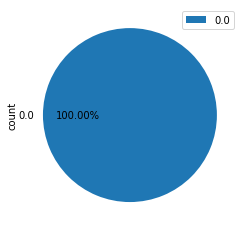

In [192]:
dlxtdh.loc[dlxtdh['KT'] == 'A1'].groupby('KQXT')['KT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec4eb650>],
      dtype=object)

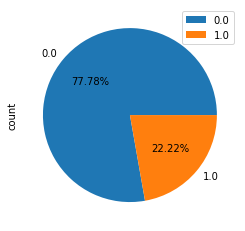

In [193]:
dlxtdh.loc[dlxtdh['KT'] == 'B'].groupby('KQXT')['KT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec6df5d0>],
      dtype=object)

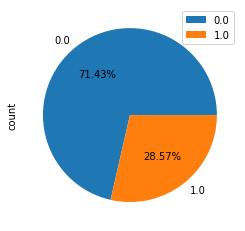

In [194]:
dlxtdh.loc[dlxtdh['KT'] == 'C'].groupby('KQXT')['KT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec48d9d0>],
      dtype=object)

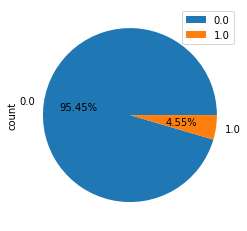

In [195]:
dlxtdh.loc[dlxtdh['KT'] == 'D1'].groupby('KQXT')['KT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

5. Trực quan dữ liệu số lượng thí sinh đậu rớt trên từng nhóm khu vực.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec3fb150>],
      dtype=object)

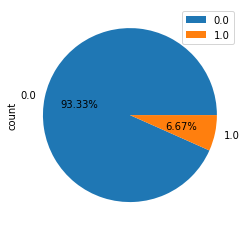

In [196]:
dlxtdh.loc[dlxtdh['KV'] == '1'].groupby('KQXT')['KV'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec3ce850>],
      dtype=object)

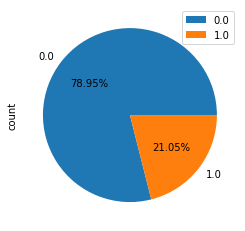

In [197]:
dlxtdh.loc[dlxtdh['KV'] == '2'].groupby('KQXT')['KV'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec0e00d0>],
      dtype=object)

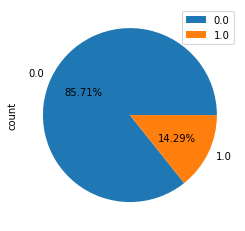

In [210]:
dlxtdh.loc[dlxtdh['KV'] == '2NT'].groupby('KQXT')['KV'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

6. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eec02db50>],
      dtype=object)

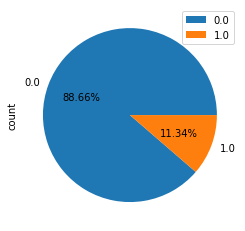

In [212]:
dlxtdh.loc[dlxtdh['DT'] == 0].groupby('KQXT')['DT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eebfbbd10>],
      dtype=object)

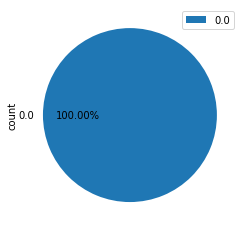

In [213]:
dlxtdh.loc[dlxtdh['DT'] == 1].groupby('KQXT')['DT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eebf86f90>],
      dtype=object)

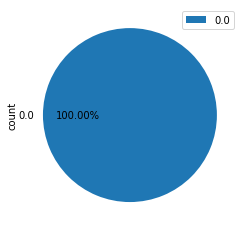

In [214]:
dlxtdh.loc[dlxtdh['DT'] == 6].groupby('KQXT')['DT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

7. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eebef1b90>],
      dtype=object)

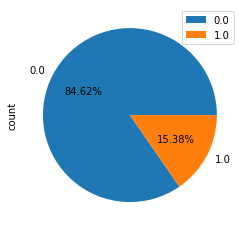

In [215]:
dlxtdh.loc[dlxtdh['GT'] == 'M'].groupby('KQXT')['GT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eeb735c10>],
      dtype=object)

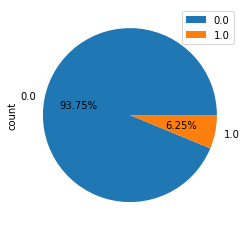

In [279]:
dlxtdh.loc[dlxtdh['GT'] == 'F'].groupby('KQXT')['GT'].agg(['count']).plot.pie(subplots = True, autopct = '%.2f%%')

Phần 4: Trực quan hóa dữ liệu nâng cao


1. Vẽ biểu đồ đường Simple cho biến T1

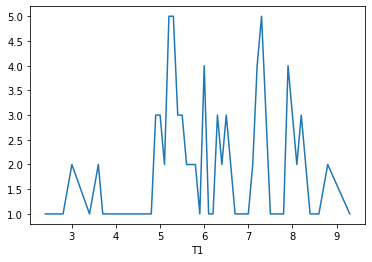

In [218]:
dlxtdh.groupby('T1')['T1'].agg('count').plot.line()

1. Hãy tạo biến phân loại (phanlopt1) cho môn toán (T1) như sau:

a. Từ 0 đến dưới 5 = kém (ký hiệu "kem")

b. Từ 5 đến dưới 7 = trung bình (ký hiệu "tb")

c. Từ 7 đến dưới 8 = khá (ký hiệu "kha")

d. Từ 8 trở lên = giỏi (ký hiệu "gioi")

In [228]:
dlxtdh.loc[dlxtdh['T1'] < 5, 'phanlop1'] = 'kem'
dlxtdh.loc[(dlxtdh['T1'] >= 5) & (dlxtdh['T1'] < 7), 'phanlop1'] = 'tb'
dlxtdh.loc[(dlxtdh['T1'] >= 7) & (dlxtdh['T1'] < 8), 'phanlop1'] = 'kha'
dlxtdh.loc[dlxtdh['T1'] >= 8, 'phanlop1'] = 'gioi'
dlxtdh

,Unnamed: 0,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT,phanlop1
0,0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,5.8,9.0,6.6,8.7,7.2,5.8,7.4,7.4,5.2,6.6,6.9,8.9,8.1,5.8,7.2,7.1,5.9,7.2,6.6,5.8,8.1,5.9,7.4,5.6,6.1,5.7,7.9,5.0,7.4,5.0,6.9,5.7,6.5,7.2,8.4,6.6,7.6,5.9,F,0.0,2NT,3.25,3.25,4.50,A1,7.00,7.54,7.01,K,K,K,2.800,3.016,2.804,0.0,kha
1,1,2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,5.4,3.2,7.2,5.4,6.1,4.7,4.7,4.3,3.8,3.7,3.7,5.2,6.6,5.8,4.4,4.9,2.8,5.1,4.5,5.6,7.0,7.6,4.7,3.0,4.6,4.4,4.9,4.3,6.3,6.7,4.4,4.0,5.4,4.0,5.2,5.5,6.6,6.1,4.4,M,0.0,1,6.00,4.00,3.50,C,4.69,5.47,5.07,Y,TB,TB,1.876,2.188,2.028,0.0,tb
2,2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,6.2,6.1,5.3,7.1,4.0,4.9,2.8,6.3,6.2,5.6,2.5,5.8,5.1,3.7,6.1,6.1,5.8,6.8,4.0,6.4,5.3,4.1,4.8,5.1,6.4,5.1,4.0,6.9,3.9,3.2,5.7,6.6,6.8,6.8,4.1,7.9,8.1,4.6,M,0.0,1,5.00,6.75,4.00,C,5.77,5.38,6.04,TB,TB,TB,2.308,2.152,2.416,1.0,tb
3,3,4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,6.2,5.5,5.5,4.4,6.5,4.9,4.4,5.9,7.3,5.9,4.9,5.7,6.8,6.8,5.4,4.1,4.4,4.1,7.3,5.3,7.1,7.3,5.6,6.1,4.9,5.3,4.0,6.2,5.5,5.9,6.5,7.4,5.6,6.6,6.8,6.6,7.1,7.3,7.4,M,0.0,1,4.25,4.25,5.25,D1,6.21,5.20,6.88,TB,TB,K,2.484,2.080,2.752,0.0,tb
4,4,5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,5.5,5.9,7.5,6.5,6.9,7.6,6.4,7.6,7.6,6.7,6.6,5.7,7.9,7.4,7.3,4.4,6.5,5.6,8.3,6.2,4.9,8.6,7.7,6.8,5.4,4.7,5.0,5.1,7.0,7.0,6.3,8.0,6.2,6.8,6.9,6.6,6.1,7.5,7.2,M,0.0,2NT,4.25,4.50,5.00,A,6.50,6.36,6.99,K,TB,K,2.600,2.544,2.796,0.0,tb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,8.6,6.9,7.4,8.8,7.6,5.8,7.3,5.7,8.9,6.8,6.5,7.3,7.0,7.3,6.9,7.6,7.7,5.6,5.9,7.7,6.8,8.1,6.6,7.5,6.7,6.8,6.0,8.3,7.5,7.1,6.8,7.8,7.9,6.7,7.2,6.1,7.2,5.3,5.2,5.2,6.6,6.9,7.4,7.0,7.6,6.3,6.1,6.2,F,0.0,1,5.25,1.50,6.25,C,7.43,7.42,6.83,K,K,K,2.972,2.968,2.732,0.0,gioi
96,96,97,3.7,5.4,6.0,5.1,5.5,3.9,6.1,4.4,4.1,4.8,5.1,4.7,5.9,6.9,4.6,5.4,3.1,3.1,5.3,5.8,5.6,5.4,6.6,4.2,3.4,4.9,5.9,6.9,5.6,6.4,5.7,4.3,5.5,4.7,4.6,3.4,6.9,7.6,7.4,4.9,5.7,7.7,5.0,7.0,6.5,7.9,7.5,4.4,F,0.0,1,5.25,3.75,4.75,C,4.93,5.15,6.39,Y,TB,TB,1.972,2.060,2.556,0.0,kem
97,97,98,8.8,5.5,7.4,7.7,6.2,7.3,8.1,4.5,9.5,7.3,6.0,8.4,7.0,8.4,8.8,6.5,9.5,6.6,6.4,7.6,7.0,9.6,9.3,6.7,8.5,6.9,5.8,8.4,8.0,8.9,9.6,7.1,9.0,7.1,6.7,5.7,6.9,8.6,8.6,5.9,8.5,7.1,6.2,8.6,7.0,9.6,8.4,5.8,M,0.0,2NT,7.00,8.00,4.00,C,7.05,7.84,7.67,K,K,K,2.820,3.136,3.068,1.0,gioi
98,98,99,2.7,1.8,3.4,5.3,4.5,7.9,4.9,3.8,2.8,5.7,5.1,5.0,5.5,6.6,3.9,4.3,6.2,6.9,7.6,6.3,4.7,7.4,5.9,5.7,5.2,5.1,6.8,5.6,3.8,5.9,6.7,4.4,4.1,5.3,5.7,4.6,5.0,5.9,5.3,4.5,4.3,5.6,6.3,4.7,5.0,6.6,5.2,5.9,M,0.0,1,5.00,3.50,5.50,C,4.15,4.72,5.29,Y,Y,TB,1.660,1.888,2.116,0.0,kem


1. Lập bảng tần số cho biến phanloait1


In [269]:
pd.pivot_table(dlxtdh.groupby('phanlop1')['phanlop1'].agg(['count']), columns = 'phanlop1')

phanlop1,gioi,kem,kha,tb
count,12,23,19,46


2. Vẽ biểu đồ đường Multiple Line cho biến T1 được phân loại bởi biến phanlopt1

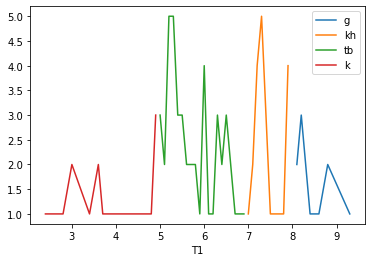

In [270]:
gioi = dlxtdh['T1'].loc[dlxtdh['phanlop1'] == 'gioi']
kha = dlxtdh['T1'].loc[dlxtdh['phanlop1'] == 'kha']
tb = dlxtdh['T1'].loc[dlxtdh['phanlop1'] == 'tb']
kem = dlxtdh['T1'].loc[dlxtdh['phanlop1'] == 'kem']
dlxtdh.groupby(gioi)['phanlop1'].agg('count').plot(label = 'g')
dlxtdh.groupby(kha)['phanlop1'].agg('count').plot(label = 'kh')
dlxtdh.groupby(tb)['phanlop1'].agg('count').plot(label = 'tb')
dlxtdh.groupby(kem)['phanlop1'].agg('count').plot(label = 'k')
plt.legend()